Retrieving the data from the CSV through urllib library

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7dedc9198970>)

Using pandas we have to read the csv file and put them in a dataframe

In [2]:
import pandas as pd
medical_df=pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## objective is to find a way to estimate the value in the "charges" column using the values in the other column.

first check the datatype for each column

In [3]:
 medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
!pip install jovian --quiet
import jovian
jovian.commit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# AGE
The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47(64-18+1) bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig_age=px.histogram(medical_df,x='age',marginal='box',
                      nbins=47,title='Distribution of age')
fig_age.update_layout(bargap=0.1)
fig_age.show()

#BMI DISTRIBUTION

In [10]:
fig_bmi=px.histogram(medical_df,x='bmi',marginal='box',
                     color_discrete_sequence=['red'],
                     title='BMI distribution')
fig_bmi.update_layout(bargap=0.1)
fig_bmi.show()

In [11]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

#CHARGES


In [12]:
fig_charges=px.histogram(medical_df,x='charges',
                         marginal='box',color='smoker',
                         color_discrete_sequence=['grey','green'],
                         title='ANNUAL MEDICAL CHARGES')
fig_charges.update_layout(bargap=0.1)
fig_charges.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"

There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \ 7300,the median for smokers is close to
35,000.


#SMOKER

In [13]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [15]:
px.histogram(medical_df,x='region',color='sex',title='Observation')

#RELATION B/W CHARGES AND OTHER COLUMNS

#i)AGE AND CHARGES

In [16]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',
               opacity=0.8,hover_data=['sex'],title='Age and charges')
fig.update_traces(marker_size=5)
fig.show()

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

1.The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

2.The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

3.The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

#BMI AND CHARGES

In [17]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',
               opacity=0.8,hover_data=['sex'],title='BMI vs CAHRGES')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.



#CHARGES AND SMOKERS

In [18]:
fig=px.scatter(medical_df,x='sex',y='charges',color='smoker',
               opacity=0.8,hover_data=['children'],title='Charges vs sex')
fig.update_traces(marker_size=5)
fig.show()

In [19]:
px.violin(medical_df,x='children',y='charges',hover_data=['smoker'])

#CORRELATION
This relation is used to measure the correlation numerically called correlation coefficient.
.corr method of pandas is used.


In [20]:
medical_df.charges.corr(medical_df.age) #correlation between charges and age

0.2990081933306476

In [21]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [22]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

For correlating smoker to charges u need both numeric datas but smoker is not numeric data so we will convert it then take out the correlation.*** * ***

In [23]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [24]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.


#Correlation formula
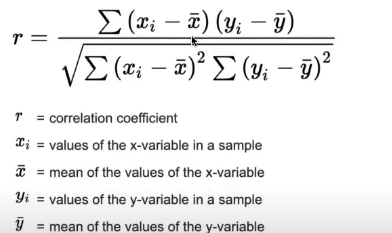

In [25]:
sex_values={'male':1, 'female':0}
medical_numeric=medical_df.sex.map(sex_values)
medical_numeric
medical_df.charges.corr(medical_numeric)


0.057292062202025484

#CORRELATION GRAPHS
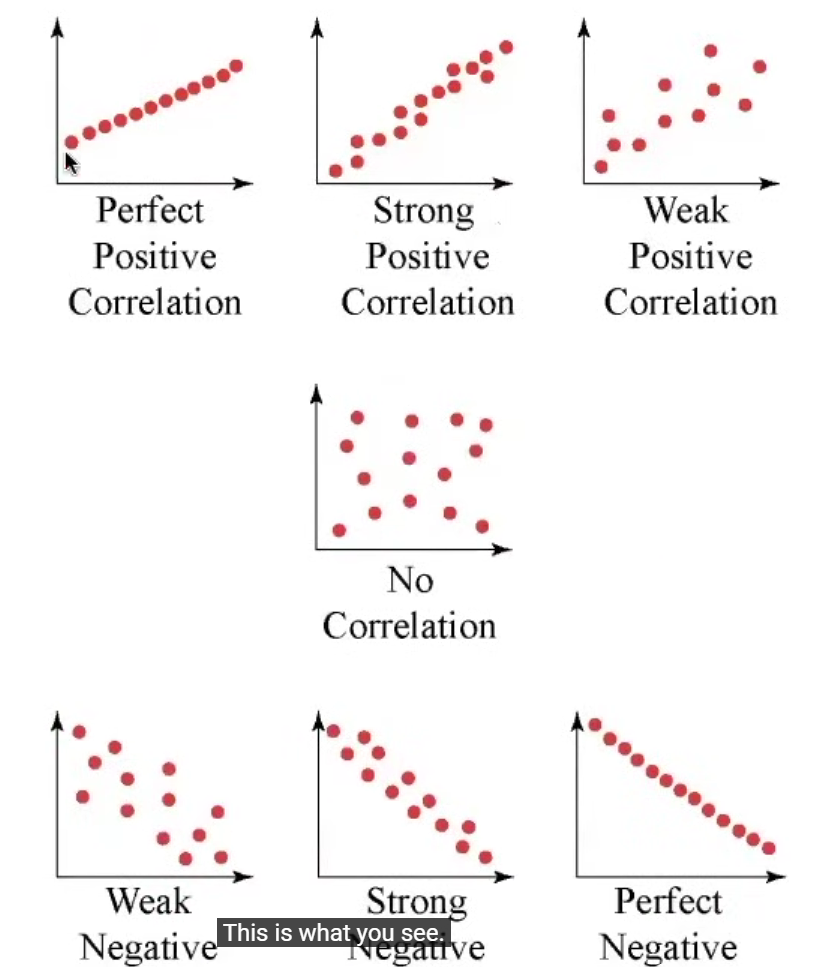

In [26]:
 medical_df.corr()

<ipython-input-26-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#CORRELATION MATRIX
using heatmap we define a correlation matrix which is basically the above thing but colorfully

<ipython-input-27-e7c57b849252>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



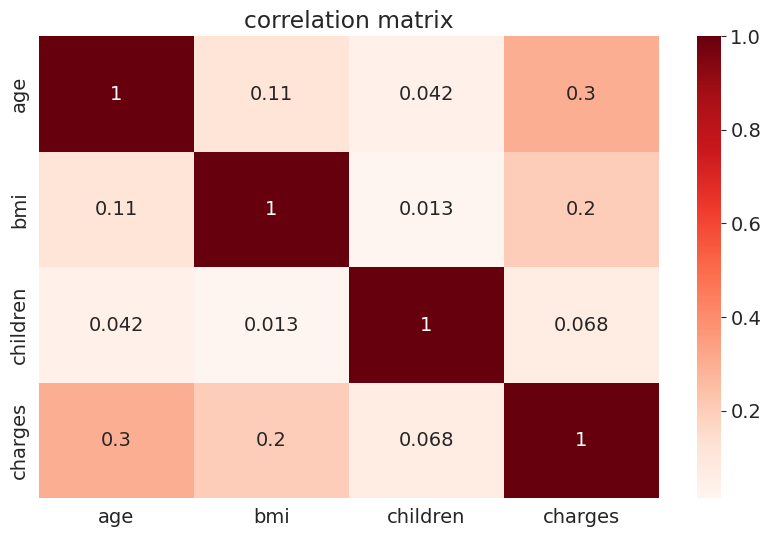

In [27]:
sns.heatmap(medical_df.corr(),cmap='Reds',annot=True)
plt.title('correlation matrix');

#LINEAR REGRESSION USING SINGLE FEATURE
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [28]:
non_smoker_df=medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

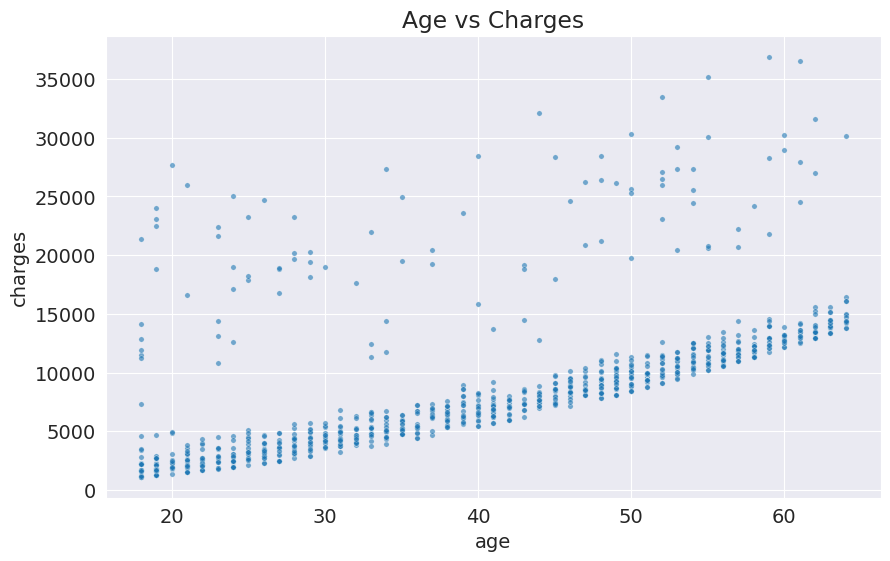

In [29]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.6,s=15)

y=wx+b

The line is characterized two numbers:
�
w (called "slope") and
�
b (called "intercept").

Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:


**charges=w×age+b**

We'll try determine
w and
b for the line that best fits the data.

This technique is called **linear regression**, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers
�
w and
�
b are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute

charges, given
age,
w and
b.

In [30]:
def estimate_charges(age,w,b):
  return w*age+b
#it is our first model

In [31]:
w=50
b=100

In [32]:
ages=non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [33]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [34]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0.5, 0, 'Ages')

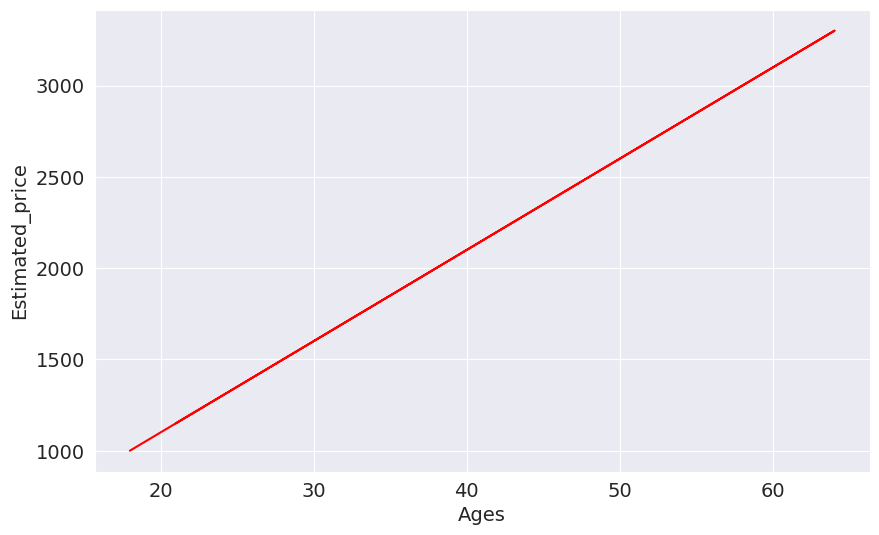

In [35]:
plt.plot(ages,estimated_charges,'r-')
plt.ylabel('Estimated_price')
plt.xlabel('Ages')

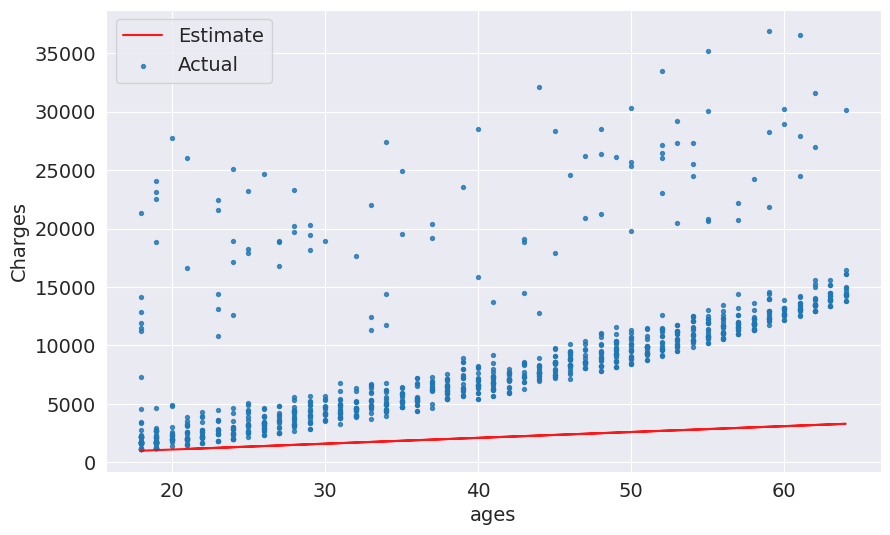

In [36]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9);
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('ages')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [37]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  charges=non_smoker_df.charges
  estimated_charges=estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges,'r',alpha=0.9)
  plt.scatter(ages,charges,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Estimated_price')
  plt.legend(['Estimate','Actual'])

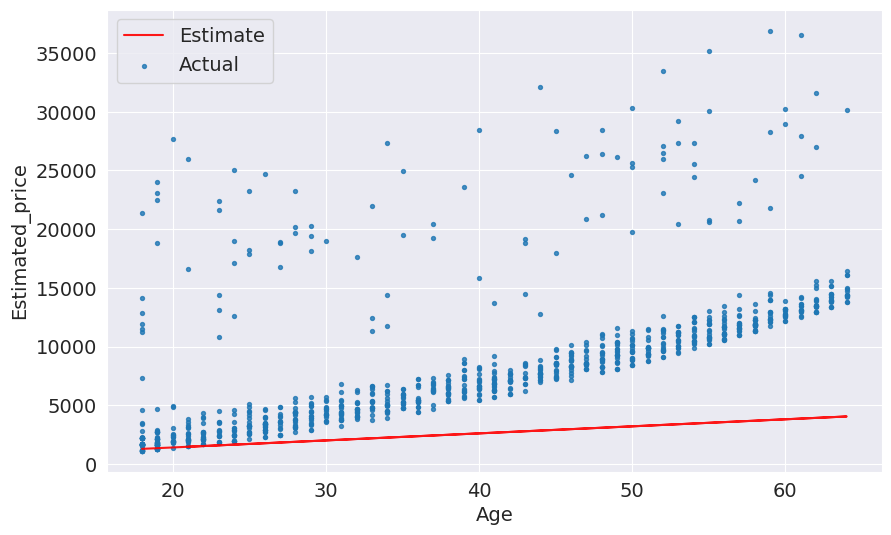

In [38]:
try_parameters(60,200)

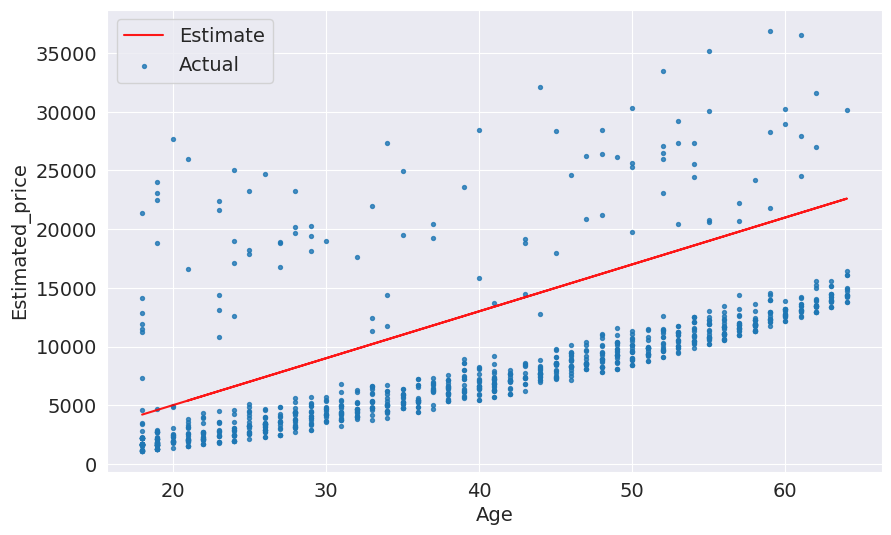

In [39]:
try_parameters(400,-3000)

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges".

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

In [40]:
targets=non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [41]:
predicted=estimated_charges
predicted

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

# Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [42]:
import numpy as np

In [43]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [44]:
w=50
b=100

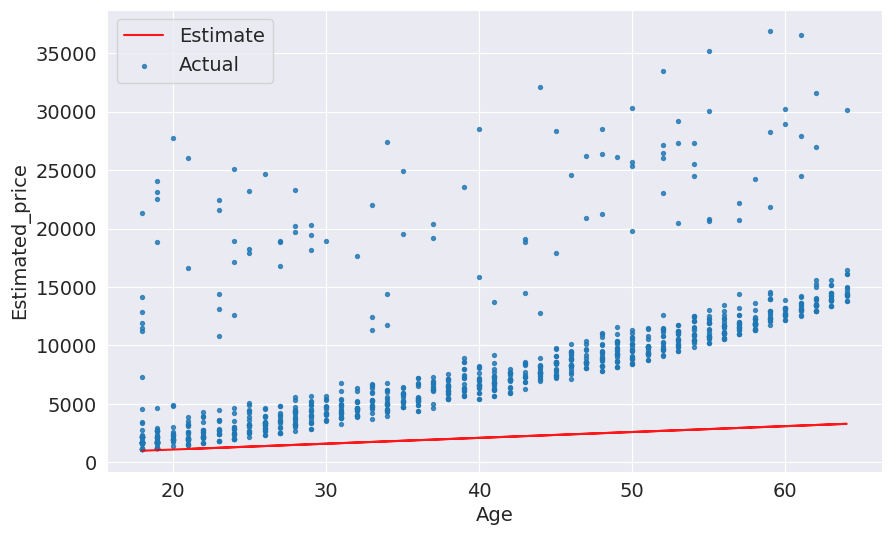

In [45]:
try_parameters(w,b)

In [46]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age,w,b)

In [47]:
rmse(targets,predicted)

8461.949562575493

In [48]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  predictions=estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Ages')
  plt.ylabel('charges')
  plt.legend(['Prediction','Actual'])

  loss=rmse(target,predictions)
  print(loss)

8461.949562575493


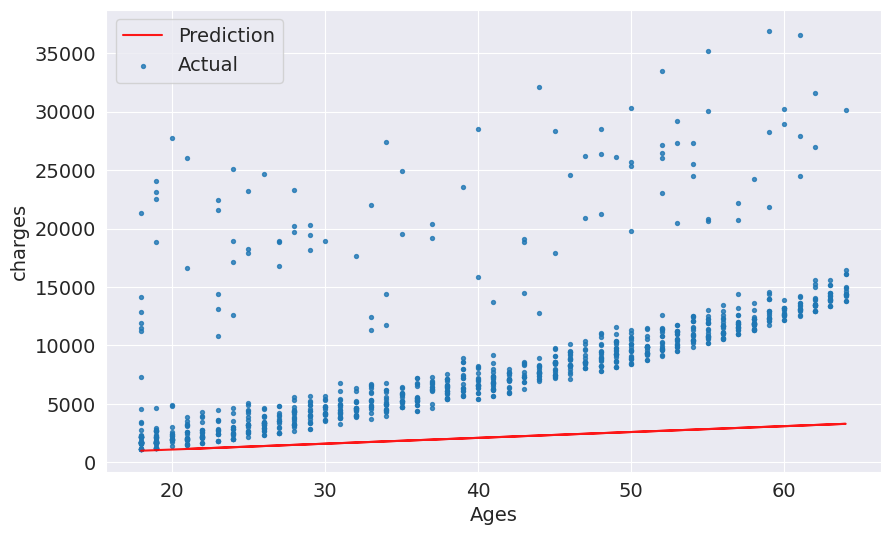

In [49]:
try_parameters(50,100)

4991.993804156943


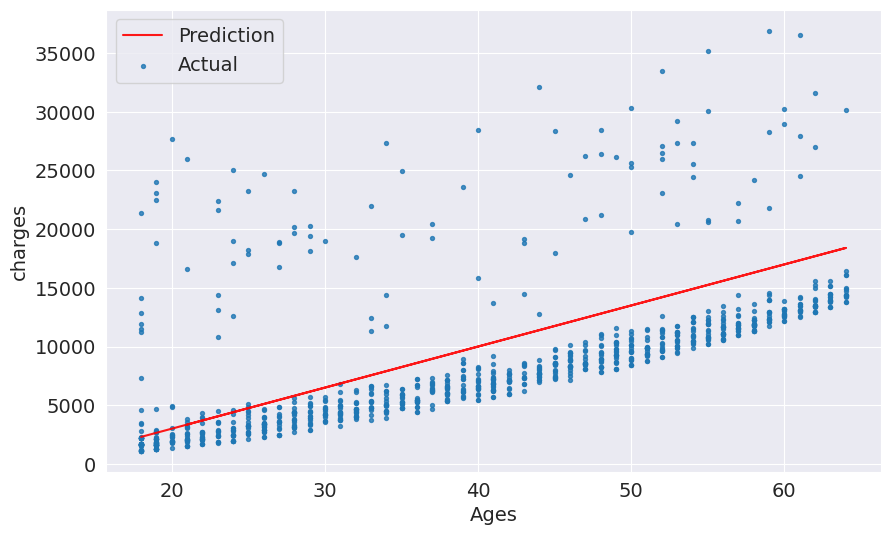

In [50]:
try_parameters(350,-4000)

4691.1378722343725


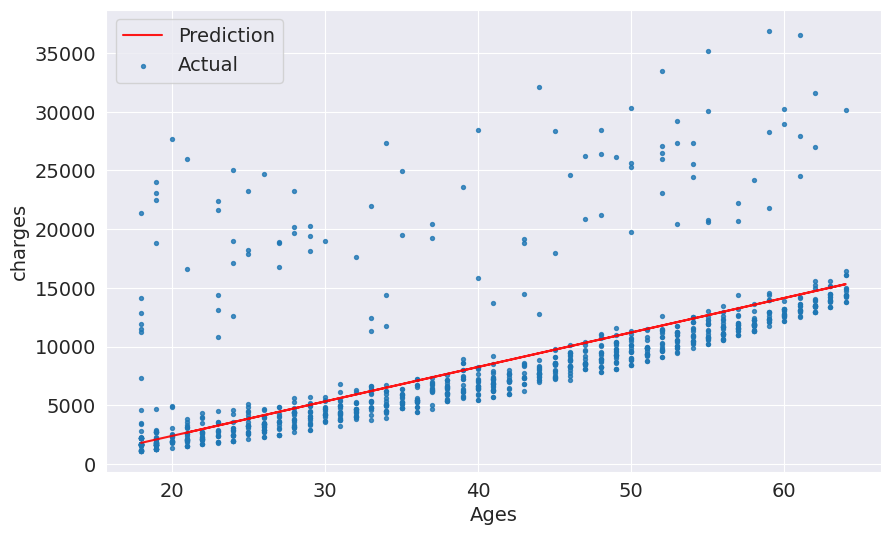

In [51]:
try_parameters(294,-3500)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?


In [52]:
!pip install scikit-learn --quiet

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model=LinearRegression()

In [55]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [56]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [57]:
model.fit(inputs,targets)

LinearRegression()

In [58]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [59]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [60]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [61]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [62]:
rmse(targets,predictions)

4662.505766636395

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [63]:
#w
model.coef_

array([267.24891283])

In [64]:
#b
model.intercept_

-2091.4205565650864

4662.505766636398


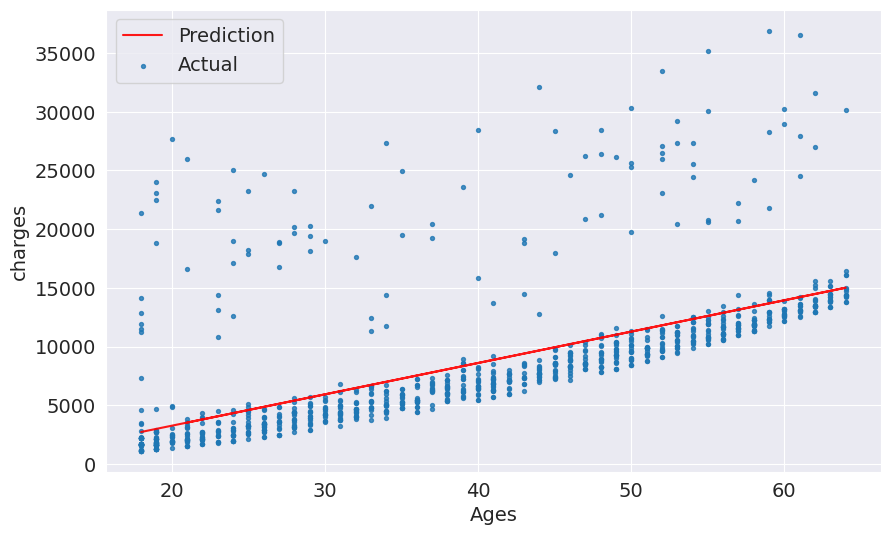

In [65]:
try_parameters(267.2489,-2091.420)

In [66]:
from sklearn.linear_model import SGDRegressor

In [67]:
model1=SGDRegressor()

In [68]:
help(model1.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [69]:
inputs=non_smoker_df[['age']]
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [70]:
targets=non_smoker_df.charges

In [71]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [72]:
model1.fit(inputs,targets)

SGDRegressor()

In [73]:
predictions=model.predict(inputs)

In [74]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [75]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [76]:
#w
model1.coef_

array([301.97609998])

In [77]:
#b
model1.intercept_

array([-5775.4415701])

In [78]:
rmse(targets,predictions)

4662.505766636395

4861.137741781299


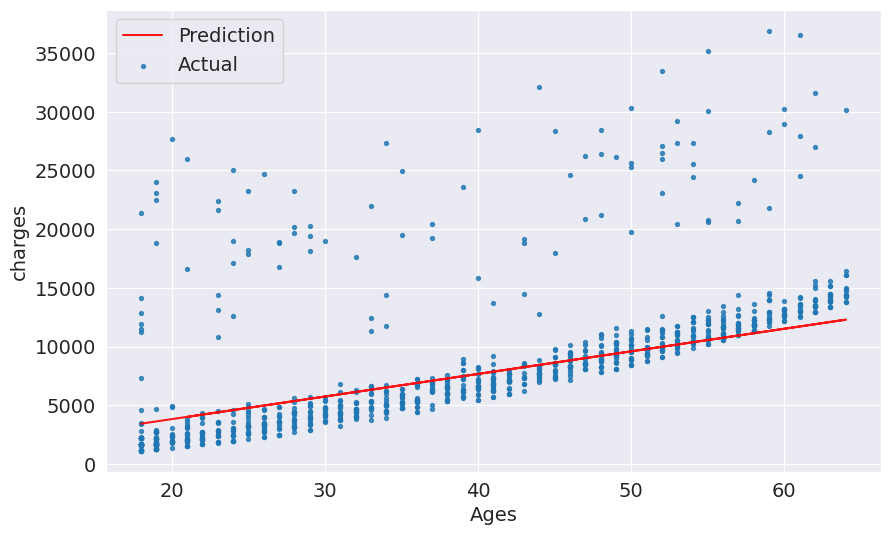

In [79]:
try_parameters(192.59,-38.19)

# Linear Regression Model For Smokers

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for smokers. First, let's create a data frame containing just the data for smokers.


In [80]:
smoker_df=medical_df[medical_df.smoker=='yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

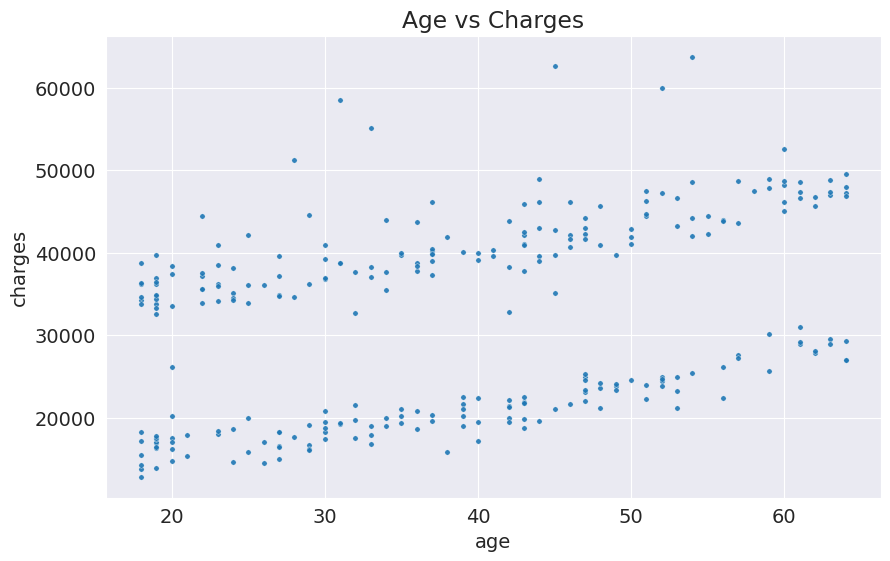

In [81]:
plt.title('Age vs Charges')
sns.scatterplot(data=smoker_df,x='age',y='charges',alpha=0.9,s=15)

In [82]:
def estimate_charges_smoker(age,w,b):
  return age*w+b

In [83]:
ages=smoker_df.age
ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [84]:
target=smoker_df.charges
target

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [85]:
w=500
b=1000
estimated_charges_smoker=estimate_charges_smoker(ages,w,b)
estimated_charges_smoker

0       10500
11      32000
14      14500
19      16000
23      18000
        ...  
1313    10500
1314    16000
1321    32000
1323    22000
1337    31500
Name: age, Length: 274, dtype: int64

In [86]:
def try_parameters_smoker(w,b):
  ages=smoker_df.age
  target=smoker_df.charges
  estimated_charges_smoker=estimate_charges_smoker(ages,w,b)
  plt.plot(ages,estimated_charges_smoker,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.7)
  plt.xlabel('Ages')
  plt.ylabel('Estimated_Charges')
  plt.legend(['Estimate','Actual'])

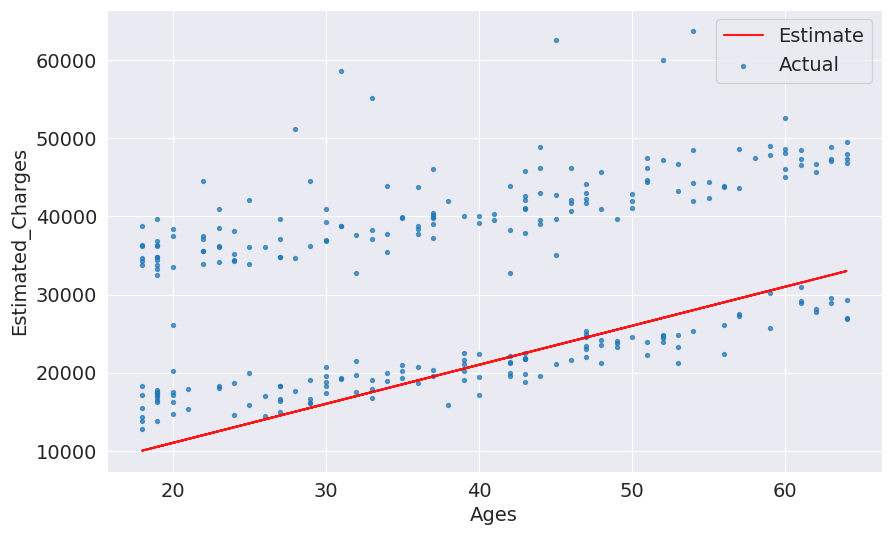

In [87]:
try_parameters_smoker(500,1000)

# **Loss Function**

In [88]:
target_smoker=smoker_df.charges
predictions_smoker=estimate_charges_smoker

In [89]:
def rmse_smoker(target_smoker,predictions_smoker):
  return np.sqrt(np.mean(np.square(target_smoker-predictions_smoker)))

In [90]:

w=500
b=1000
predictions_smoker=estimate_charges_smoker(ages,w,b)

In [91]:
rmse_smoker(target_smoker,predictions_smoker)

16159.375031795793

In [92]:
def try_parameter_smoker(w,b):
  target_smoker=smoker_df.charges
  ages_smoker=smoker_df.age
  predictions_smoker=estimate_charges_smoker(ages,w,b)

  plt.plot(ages,predictions_smoker,'r',alpha=0.9)
  plt.scatter(ages,target_smoker,alpha=0.7)
  plt.xlabel('Ages')
  plt.ylabel('Charges')
  plt.legend(['predictions','target'])

  loss=rmse_smoker(target_smoker,predictions_smoker)
  print('Loss: ',loss)

Loss:  11395.289171931876


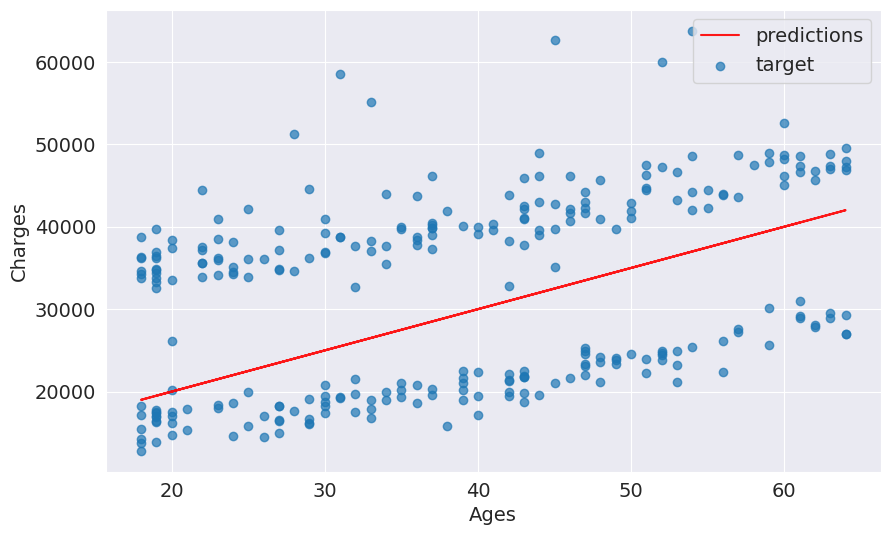

In [93]:
try_parameter_smoker(500,10000)

In [94]:
model=LinearRegression()

In [95]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [96]:
input_smoker=smoker_df[['age']]

In [97]:
model.fit(input_smoker,target_smoker)

LinearRegression()

In [98]:
predictions_smoker=model.predict(input_smoker)
predictions_smoker

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [99]:
target_smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [100]:
rmse(target_smoker,predictions_smoker)

10711.00334810241

In [101]:
#w
model.coef_

array([305.23760211])

In [102]:
#b
model.intercept_

20294.128126915966

Loss:  10711.00334810241


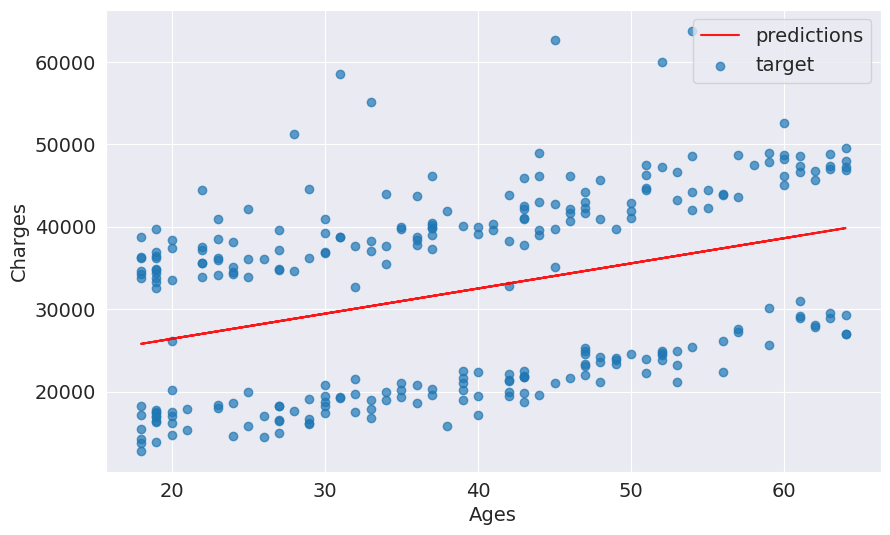

In [103]:
try_parameter_smoker(model.coef_,model.intercept_)

In [104]:
from sklearn.linear_model import SGDRegressor

In [105]:
model1=SGDRegressor()

In [106]:
model1.fit(input_smoker,target_smoker)

SGDRegressor()

In [107]:
predictions_smoker1=model1.predict(input_smoker)
predictions_smoker1

array([-1.73577476e+10, -3.28531893e+10, -2.02406205e+10, -2.13216978e+10,
       -2.27631342e+10, -2.16820569e+10, -1.84388249e+10, -2.06009796e+10,
       -2.31234933e+10, -3.21324711e+10, -2.34838525e+10, -2.78081618e+10,
       -2.34838525e+10, -3.14117529e+10, -1.69973885e+10, -2.96099573e+10,
       -1.77181067e+10, -2.06009796e+10, -2.02406205e+10, -1.84388249e+10,
       -2.38442116e+10, -2.67270844e+10, -3.10513938e+10, -3.17721120e+10,
       -3.35739075e+10, -3.06910346e+10, -2.42045707e+10, -3.24928302e+10,
       -1.77181067e+10, -3.32135484e+10, -2.09613387e+10, -2.63667253e+10,
       -1.73577476e+10, -2.20424160e+10, -2.27631342e+10, -2.13216978e+10,
       -2.70874435e+10, -2.56460071e+10, -2.78081618e+10, -1.69973885e+10,
       -2.13216978e+10, -2.56460071e+10, -1.69973885e+10, -3.32135484e+10,
       -2.34838525e+10, -2.02406205e+10, -2.31234933e+10, -1.73577476e+10,
       -2.56460071e+10, -2.49252889e+10, -1.73577476e+10, -1.87991840e+10,
       -3.32135484e+10, -

In [108]:
#w
model1.coef_

array([-3.6035911e+08])

In [109]:
#b
model1.intercept_

array([-1.05109245e+10])

Loss:  24898918314.749393


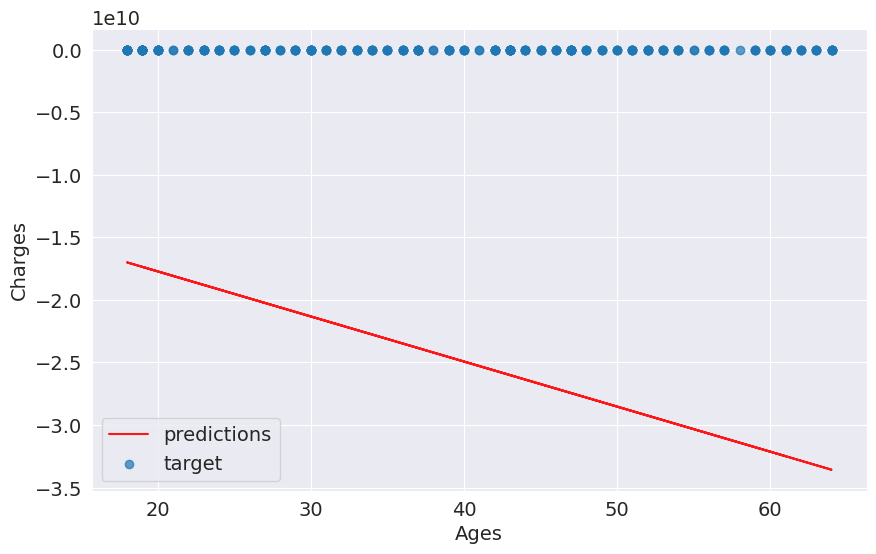

In [110]:
try_parameter_smoker(model1.coef_,model1.intercept_)

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [111]:
inputs=non_smoker_df[['age','bmi']]
target=non_smoker_df['charges']
inputs

,age,bmi
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
5,31,25.740
...,...,...
1332,52,44.700
1333,50,30.970
1334,18,31.920
1335,18,36.850


In [112]:
model=LinearRegression().fit(inputs,target)

In [113]:
predictions=model.predict(inputs)

In [114]:
loss=rmse(target,predictions)
loss

4662.3128354612945

NO MAJOR CHAnge in the loss so bmi has very weak correlation with charges

In [115]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [116]:
fig=px.scatter(non_smoker_df,x='bmi',y='charges',title='BMI vs CHARGES')
fig.update_traces(marker_size=5)
fig.show()

In [117]:
fig=px.scatter_3d(non_smoker_df,x='age',y='bmi',z='charges')
fig.update_traces(marker_size=3,marker_opacity=0.5)
fig.show()

In [118]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [119]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [120]:
fig=px.strip(non_smoker_df,x='children',y='charges')
fig.update_traces(marker_size=3,marker_opacity=0.7)
fig.show()

In [121]:
inputs=non_smoker_df[['age','bmi','children']]

In [122]:
model=LinearRegression().fit(inputs,target)

In [123]:
predictions=model.predict(inputs)

In [124]:
loss=rmse(target,predictions)
loss

4608.470405038247

In [125]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

# Smoker Multiple Linear Regression

In [126]:
inputs=smoker_df[['age','bmi','children']]
inputs

,age,bmi,children
0,19,27.900,0
11,62,26.290,0
14,27,42.130,0
19,30,35.300,0
23,34,31.920,1
...,...,...,...
1313,19,34.700,2
1314,30,23.655,3
1321,62,26.695,0
1323,42,40.370,2


In [127]:
target=smoker_df['charges']

In [128]:
fig=px.scatter(smoker_df,x='bmi',y='charges')
fig.update_traces(marker_size=3)
fig.show()

In [129]:
smoker_df.charges.corr(smoker_df.bmi)

0.8064806070155404

In [130]:
smoker_df.charges.corr(smoker_df.age)

0.36822444373077773

In [131]:
smoker_df.charges.corr(smoker_df.children)

0.03594500581268586

In [132]:
model=LinearRegression().fit(inputs,target)

In [133]:
predictions=model.predict(inputs)
predictions

array([22618.1884404 , 31693.96060294, 45210.77119855, 36179.04984359,
       32574.75789237, 38280.47283345, 34491.20326882, 37430.66597302,
       39673.65505819, 50745.19952649, 37823.65621158, 30644.00355221,
       36516.95440038, 46376.03606843, 28189.41244149, 24602.37557441,
       14998.88525137, 19959.40909163, 20205.65661719, 37596.31665807,
       37711.9779549 , 22703.37143896, 37375.90626513, 36588.90352178,
       39829.62110441, 20982.81806389, 15278.84699791, 37248.25549378,
       23261.8430465 , 44619.71128168, 25523.94958189, 34404.01390466,
       23193.68014538, 11878.55912315, 23249.25045408, 27265.69025614,
       34101.52728187, 22194.20777283, 25294.47251353, 18432.71803104,
       36509.95757395, 26841.30329054, 35229.88217012, 48374.79465667,
       47853.7091819 , 36506.45916073, 27024.68302364, 32545.42035129,
       24021.39393614, 20407.56334086, 24301.50167746, 36693.33730705,
       34045.05120268,  7486.09835485, 40859.54427143, 41366.99156626,
      

In [134]:
loss=rmse(target,predictions)
loss

5718.202480524154

In [135]:
model.coef_,model.intercept_

(array([ 264.93316919, 1438.72926245,  198.88027911]), -22556.088196491593)

# For the whole dataset not jsut for smoker or non smoker

In [136]:
inputs,target=medical_df[['age','bmi','children']],medical_df['charges']

In [137]:
model=LinearRegression().fit(inputs,target
)

In [138]:
predictions=model.predict(inputs)
predictions

array([ 6908.77753344,  9160.97706103, 12390.94691779, ...,
        9640.92917145,  6691.39141657, 17377.08299024])

In [139]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [140]:
loss=rmse(target,predictions)
loss

11355.317901125973

In [141]:
px.scatter(medical_df,x='age',y='charges',color='smoker')

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



<Axes: xlabel='smoker', ylabel='charges'>

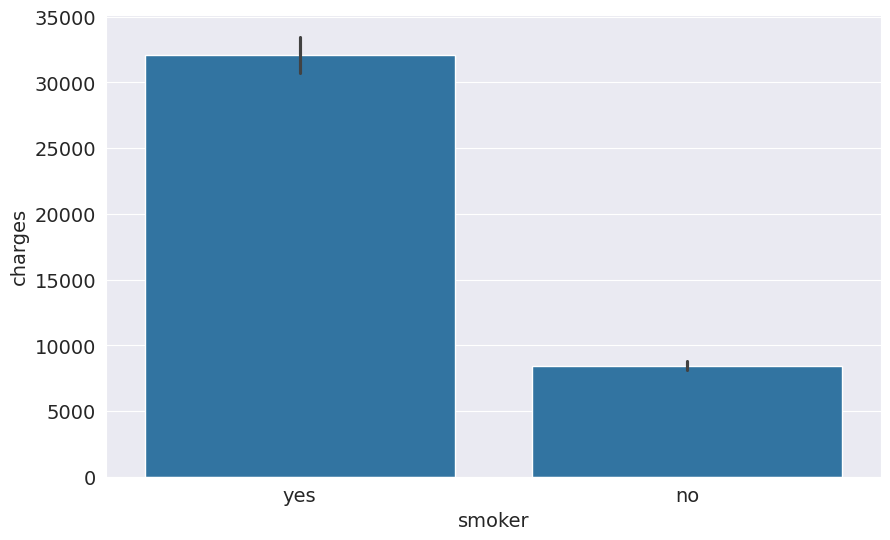

In [142]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [143]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_df']=medical_df.smoker.map(smoker_codes)

In [144]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_df
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [145]:
sex_codes={'female':0,'male':1}
medical_df['male_df']=medical_df.sex.map(sex_codes)

In [146]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_df,male_df
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [147]:
medical_df.charges.corr(medical_df.smoker_df)

0.787251430498478

We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [148]:
inputs=medical_df[['age','children','bmi','smoker_df']]
target=medical_df['charges']

In [149]:
model=LinearRegression().fit(inputs,target)

In [150]:
predictions=model.predict(inputs)

In [151]:
loss=rmse(target,predictions)
loss

6056.439217188081

In [152]:
model.coef_,model.intercept_

(array([  257.84950728,   473.50231561,   321.85140247, 23811.3998446 ]),
 -12102.769362727908)

The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

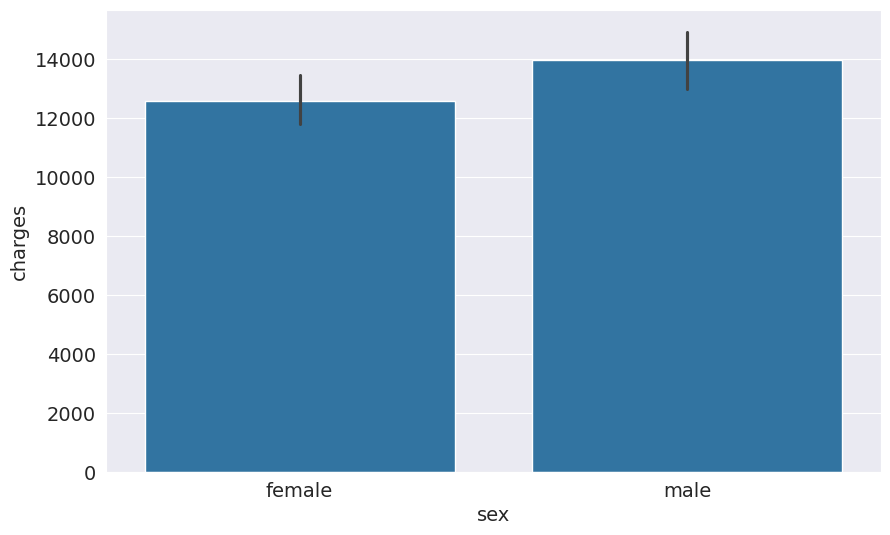

In [153]:
sns.barplot(data=medical_df,x='sex',y='charges')

In [154]:
medical_df.charges.corr(medical_df.male_df
                        )

0.057292062202025484

In [155]:
inputs=medical_df[['age','bmi','children','male_df','smoker_df']]

In [156]:
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)

In [157]:
rmse(target,predictions)

6056.100708754546


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

<Axes: xlabel='region', ylabel='charges'>

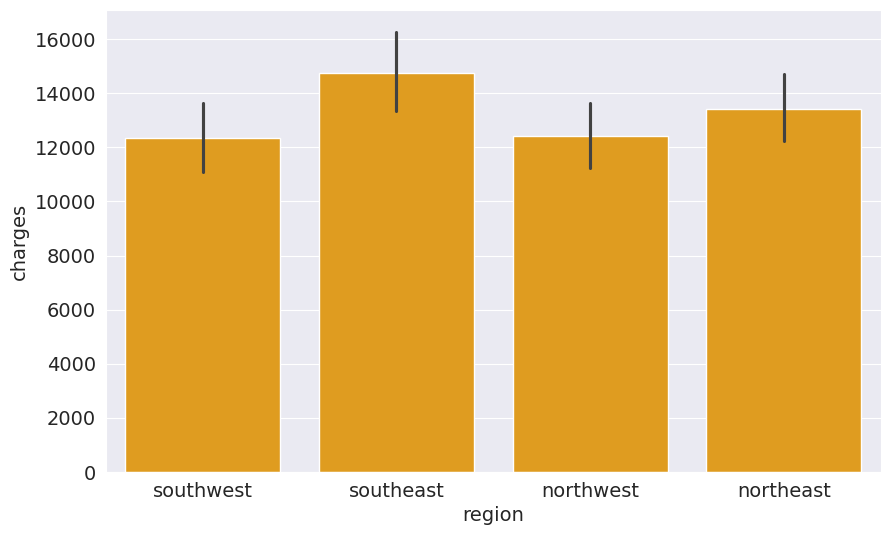

In [158]:
sns.barplot(data=medical_df,x='region',y='charges',color='orange')

In [159]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [160]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [161]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [162]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_df,male_df,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [163]:
inputs=medical_df[['age','bmi','children','male_df','smoker_df','northeast','northwest','southeast','southwest']]
target=medical_df[['charges']]
model=LinearRegression().fit(inputs,target)

In [164]:
predictions=model.predict(inputs)

In [165]:
rmse(predictions,target)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



charges    6041.679651
dtype: float64

In [166]:
model.coef_,model.intercept_

(array([[  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
         23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
          -373.04175627]]),
 array([-12525.5478112]))

SMOKER MULTIPLE REGRESSION USING CATEGORICAL DATA AS WELL

In [167]:
smoker_file=medical_df[medical_df.smoker=='yes']
smoker_file

,age,sex,bmi,children,smoker,region,charges,smoker_df,male_df,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


In [168]:
inputs=smoker_file[['age','bmi','children','northeast','northwest','southeast','southwest','male_df']]
target=smoker_file['charges']
model=LinearRegression().fit(inputs,target)

In [169]:
predictions=model.predict(inputs)

In [170]:
rmse(target,predictions)

5668.4678821121515

# NON SMOKER Multiple Regression Model with Classification datas


In [171]:
non_smoker_file=medical_df[medical_df.smoker=='no']
non_smoker_file

,age,sex,bmi,children,smoker,region,charges,smoker_df,male_df,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0,0.0,0.0,0.0,1.0
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0


In [172]:
inputs=non_smoker_file[['age','bmi','children','male_df','northwest','northeast','southwest','southeast']]
target=non_smoker_file['charges']

In [173]:
model=LinearRegression().fit(inputs,target)

In [174]:
predictions=model.predict(inputs)

In [175]:
rmse(predictions,target)

4573.074988795492

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [176]:
input_cols=['age','children','bmi','smoker_df','male_df','northeast','southeast','northwest','southwest']
inputs=medical_df[input_cols]
target=medical_df['charges']

In [177]:
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
rmse(target,predictions)

6041.6796511744515

In [178]:
model.coef_,model.intercept_

(array([  256.85635254,   475.50054515,   339.19345361, 23848.53454191,
         -131.3143594 ,   587.00923503,  -448.01281436,   234.0453356 ,
         -373.04175627]),
 -12525.54781119545)

In [179]:
medical_df[input_cols].loc[10]

age          25.00
children      0.00
bmi          26.22
smoker_df     0.00
male_df       1.00
northeast     1.00
southeast     0.00
northwest     0.00
southwest     0.00
Name: 10, dtype: float64

In [180]:
model.predict([[28,2,30,1,0,0,0,1,0.]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [181]:
model.coef_

array([  256.85635254,   475.50054515,   339.19345361, 23848.53454191,
        -131.3143594 ,   587.00923503,  -448.01281436,   234.0453356 ,
        -373.04175627])

In [182]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,children,475.500545
2,bmi,339.193454
3,smoker_df,23848.534542
4,male_df,-131.314359
5,northeast,587.009235
6,southeast,-448.012814
7,northwest,234.045336
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [183]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_df,male_df,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
numeric_cols=['age','bmi','children']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [186]:
scaler.mean_,scaler.var_

(array([39.20702541, 30.66339686,  1.09491779]),
 array([197.25385199,  37.16008997,   1.45212664]))

In [187]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [188]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [189]:
cat_cols=['smoker_df','male_df','northeast','northwest','southeast','southwest']
categorical_data=medical_df[cat_cols].values

In [190]:
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [191]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)

In [192]:
inputs
target=medical_df.charges

In [193]:
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)

In [194]:
rmse(target,predictions)

6041.6796511744515

We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [195]:
weights_df=pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_df,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,male_df,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [196]:
new_coustemer=[[23,2,30,1,0,0,1,0,0.]]

In [197]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [198]:
model.predict([[-0.79795355 , -0.10882659,  0.75107928,1,0,0,1,0,0.]])

array([29875.81463371])

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model(in this case linear regression), loss functions(RMSE) and optimizer(LEAST SQUARES) for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)